# Support Vector Regression (SVR)

## Importing the libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [9]:
dataset = pd.read_csv('Position_Salaries.csv')
data_X = dataset.iloc[:, 1:-1].values
data_Y = dataset.iloc[:, -1].values

In [10]:
data_X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [11]:
print(data_Y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [12]:
data_Y = data_Y.reshape(len(data_Y),1)

In [13]:
print(data_Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
data_X = sc_X.fit_transform(data_X)

In [15]:
from sklearn.preprocessing import StandardScaler
sc_Y = StandardScaler()
data_Y = sc_Y.fit_transform(data_Y)

In [16]:
print(data_X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [17]:
print(data_Y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [18]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(data_X,data_Y)

C:\Users\shaswat\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

## Predicting a new result

In [25]:
sc_Y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

## Visualising the SVR results

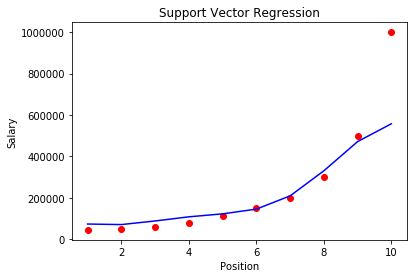

In [26]:
plt.scatter(sc_X.inverse_transform(data_X),sc_Y.inverse_transform(data_Y), color='red')
plt.plot(sc_X.inverse_transform(data_X),sc_Y.inverse_transform(regressor.predict(data_X)), color='blue')
plt.title('Support Vector Regression')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

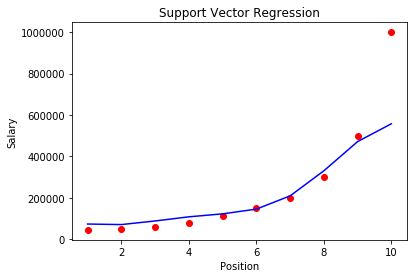

In [28]:
x_grid = np.arange(min(sc_X.inverse_transform(data_X)), max(sc_X.inverse_transform(data_X)), 0.1)
x_grid = x_grid.reshape(len(x_grid), 1)
plt.scatter(sc_X.inverse_transform(data_X),sc_Y.inverse_transform(data_Y), color='red')
plt.plot(sc_X.inverse_transform(data_X),sc_Y.inverse_transform(regressor.predict(data_X)), color='blue')
plt.title('Support Vector Regression')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()